# Import required libraries and load dataset 

In [113]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv("datasets/iris/Iris.csv")

# Explore the dataset

In [115]:
df= df.drop(columns=["SepalLengthCm","SepalWidthCm"])

In [116]:
df.head()

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa


In [117]:
df = df[df["Species"] != "Iris-setosa"]

In [118]:
df.shape

(100, 4)

In [119]:
df.Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   PetalLengthCm  100 non-null    float64
 2   PetalWidthCm   100 non-null    float64
 3   Species        100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


In [121]:
df.describe()

,Id,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000
mean,100.500000,4.906000,1.676000
std,29.011492,0.825578,0.424769
min,51.000000,3.000000,1.000000
25%,75.750000,4.375000,1.300000
50%,100.500000,4.900000,1.600000
75%,125.250000,5.525000,2.000000
max,150.000000,6.900000,2.500000


# Null value check

In [122]:
df.isnull().sum()

Id               0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Some plot to visualize the data

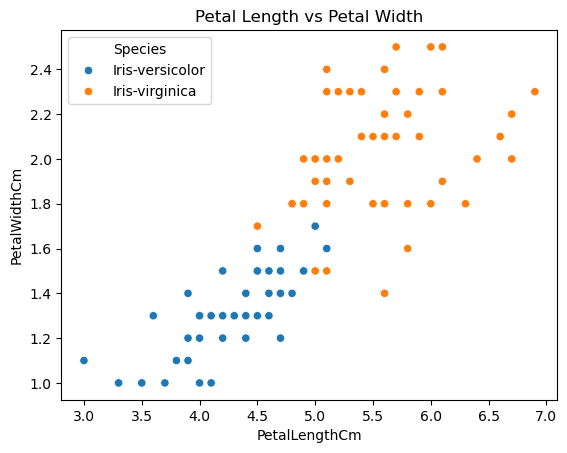

In [123]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df ,hue ='Species')
plt.title('Petal Length vs Petal Width')
plt.show()


# lets label encode all the categorical problems

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.head()

,Id,PetalLengthCm,PetalWidthCm,Species
50,51,4.7,1.4,0
51,52,4.5,1.5,0
52,53,4.9,1.5,0
53,54,4.0,1.3,0
54,55,4.6,1.5,0


In [125]:
X = df.drop(columns=["Species","Id"])
y = df.Species

# Do the test train split

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=0)

# Train the model

In [127]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(kernel='linear')

# Make some predictions

In [128]:
y_pred = svc.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

# Evaluate the model

In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



# Let's try plotting the SVM

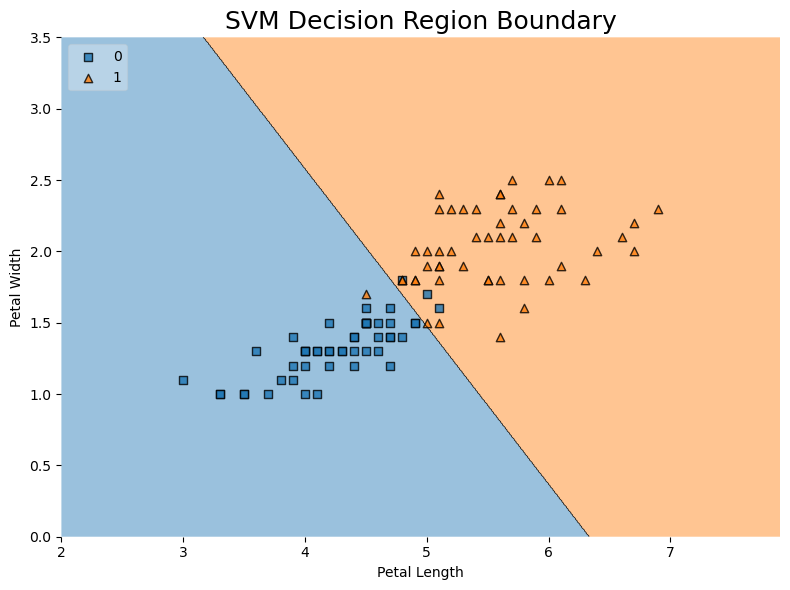

In [131]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

plot_decision_regions(X=X.values, 
                    y=y.values,
                    clf=svc,
                    legend=2)

plt.title('SVM Decision Region Boundary', size=18)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.show()